<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #F3F781;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
     Heart Attack <br>
    (Machine learning)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Heart Attack</div>**


## Goal
> ## Modeling : Predicting Heart Attack

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

# For model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-in-youth-vs-adult-in-france/heart_attack_youth_adult_france.csv')
df.head()

,Patient_ID,Age,Sex,Weight_kg,Height_cm,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Smoking_Status,...,Exercise_Induced_Pain,Heart_Attack,Age_Group,Region,Air_Pollution_Level,Income_Level,Education_Level,Health_Insurance,Regular_Checkups,Medication_Adherence
0,1,56,Male,118.4,184,35.4,96,94,204.3,Ex-Smoker,...,No,No,Adult,Central,67,Medium,College,Yes,Occasionally,Yes
1,2,46,Male,50.7,164,32.6,114,65,279.4,Non-Smoker,...,No,Yes,Adult,North,16,Low,High School,Yes,Occasionally,Yes
2,3,32,Male,118.0,179,39.8,98,118,291.4,Current Smoker,...,No,No,Adult,South,32,Medium,College,Yes,Frequently,Yes
3,4,60,Male,96.8,161,23.7,108,101,273.3,Non-Smoker,...,No,No,Youth,East,86,Low,College,Yes,Occasionally,Yes
4,5,25,Male,53.9,169,24.4,141,73,290.8,Ex-Smoker,...,No,No,Youth,South,15,Low,High School,Yes,Occasionally,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266786 entries, 0 to 266785
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_ID                266786 non-null  int64  
 1   Age                       266786 non-null  int64  
 2   Sex                       266786 non-null  object 
 3   Weight_kg                 266786 non-null  float64
 4   Height_cm                 266786 non-null  int64  
 5   BMI                       266786 non-null  float64
 6   Blood_Pressure_Systolic   266786 non-null  int64  
 7   Blood_Pressure_Diastolic  266786 non-null  int64  
 8   Cholesterol_Level         266786 non-null  float64
 9   Smoking_Status            266786 non-null  object 
 10  Alcohol_Consumption       266786 non-null  int64  
 11  Physical_Activity_Hours   266786 non-null  float64
 12  Diabetes                  266786 non-null  object 
 13  Family_History            266786 non-null  o

In [4]:
df.drop('Patient_ID', axis=1, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,266786.0,39.012842,12.399825,18.0,28.0,39.0,50.0,60.0
Weight_kg,266786.0,85.030971,20.185945,50.0,67.6,85.0,102.5,120.0
Height_cm,266786.0,174.469504,14.448139,150.0,162.0,174.0,187.0,199.0
BMI,266786.0,29.239231,6.199761,18.5,23.9,29.2,34.6,40.0
Blood_Pressure_Systolic,266786.0,134.528686,25.980116,90.0,112.0,134.0,157.0,179.0
Blood_Pressure_Diastolic,266786.0,89.458386,17.326668,60.0,74.0,89.0,104.0,119.0
Cholesterol_Level,266786.0,224.816570,43.292459,150.0,187.2,224.8,262.2,300.0
Alcohol_Consumption,266786.0,9.498085,5.768155,0.0,4.0,9.0,15.0,19.0
Physical_Activity_Hours,266786.0,7.497130,4.334888,0.0,3.7,7.5,11.3,15.0
Stress_Level,266786.0,5.491105,2.870952,1.0,3.0,5.0,8.0,10.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Sex,266786,3,Female,128065
Smoking_Status,266786,3,Non-Smoker,133491
Diabetes,266786,2,No,226827
Family_History,266786,2,No,160078
Diet_Type,266786,3,Healthy,106507
Exercise_Induced_Pain,266786,2,No,240243
Heart_Attack,266786,2,No,213313
Age_Group,266786,2,Adult,154970
Region,266786,5,North,53529
Income_Level,266786,3,Medium,106790


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Age                         0.0
Sex                         0.0
Weight_kg                   0.0
Height_cm                   0.0
BMI                         0.0
Blood_Pressure_Systolic     0.0
Blood_Pressure_Diastolic    0.0
Cholesterol_Level           0.0
Smoking_Status              0.0
Alcohol_Consumption         0.0
Physical_Activity_Hours     0.0
Diabetes                    0.0
Family_History              0.0
Diet_Type                   0.0
Stress_Level                0.0
Heart_Rate                  0.0
Exercise_Induced_Pain       0.0
Heart_Attack                0.0
Age_Group                   0.0
Region                      0.0
Air_Pollution_Level         0.0
Income_Level                0.0
Education_Level             0.0
Health_Insurance            0.0
Regular_Checkups            0.0
Medication_Adherence        0.0
dtype: float64

Duplicate Rows (%):
0.0


In [7]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Age,Sex,Weight_kg,Height_cm,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Smoking_Status,Alcohol_Consumption,...,Exercise_Induced_Pain,Heart_Attack,Age_Group,Region,Air_Pollution_Level,Income_Level,Education_Level,Health_Insurance,Regular_Checkups,Medication_Adherence


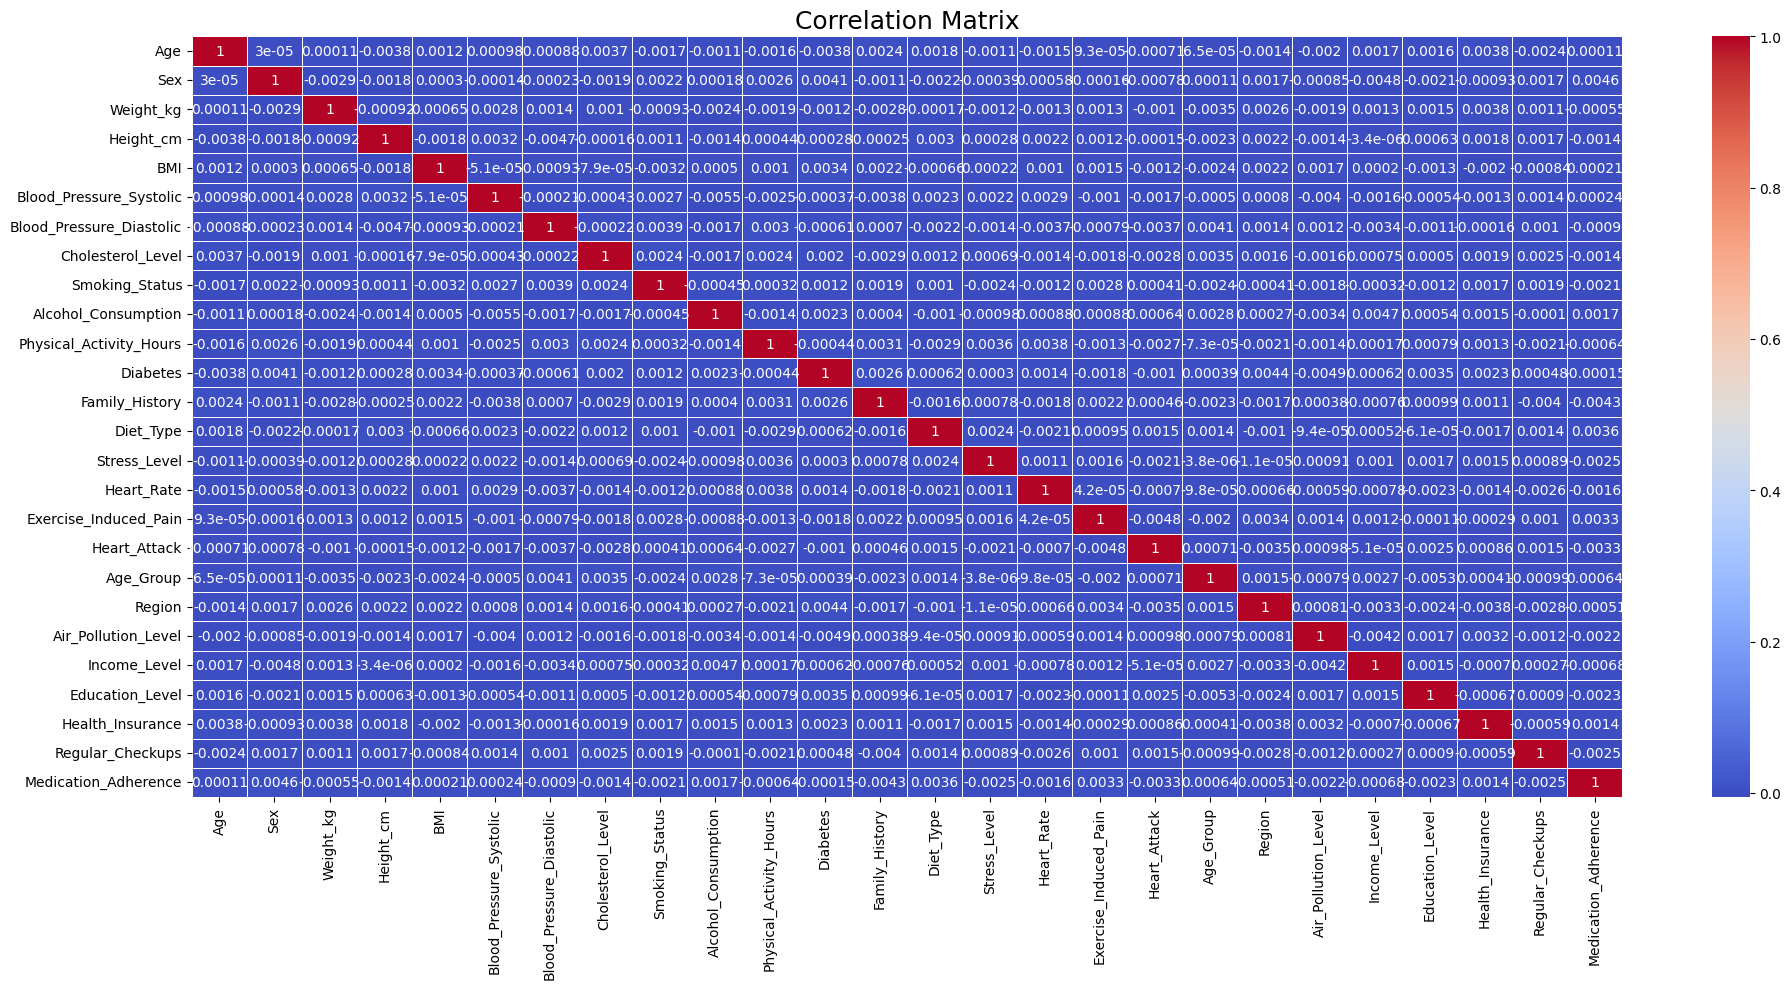

In [8]:
label_encoders = {}
categorical_features = ["Sex", "Smoking_Status", "Diabetes", "Family_History", "Diet_Type", 
                        "Exercise_Induced_Pain", "Heart_Attack", "Age_Group", "Region", 
                        "Income_Level", "Education_Level", "Health_Insurance", "Regular_Checkups", 
                        "Medication_Adherence"]

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

correlation_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=18)
plt.tight_layout()
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of classification model performance</div>

In [9]:
X = df.drop('Heart_Attack', axis=1)
y = df['Heart_Attack']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
 #   "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
#    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
#    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799636,0.639418,0.799636,0.710608
1,KNN,0.738671,0.681225,0.738671,0.704577
2,Decision Tree,0.662487,0.678579,0.662487,0.670185
3,XGBoost,0.798999,0.674075,0.798999,0.710613


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion </div>


Best Model:
Model        Logistic Regression
Accuracy                0.799636
Precision               0.639418
Recall                  0.799636
F1-Score                0.710608
Name: 0, dtype: object


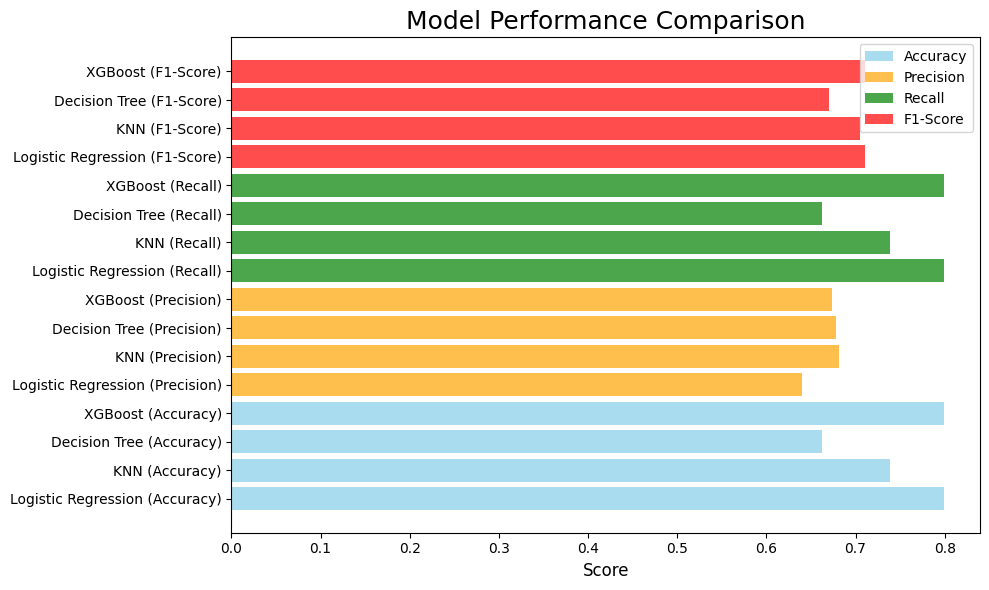


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.7996


In [10]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")